In [82]:
import os, random, matplotlib, pickle, yaml, hdbscan
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob

In [83]:
result_path = "../results/round2"
with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])
    
config_path = ".."
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [84]:
root_path = ".."
bp, marker_embed, limb_embed, angle_embed, all_embed = [], [], [], [], []
for file in tqdm(INFO_values):
    bp.append( np.load(f"{root_path}/{file['directory']}/rotated_bodypoints.npy") )
    marker_embed.append( np.load(f"{root_path}/{file['directory']}/marker_postural_embeddings.npy") )
    limb_embed.append( np.load(f"{root_path}/{file['directory']}/limb_postural_embeddings.npy") )
    angle_embed.append( np.load(f"{root_path}/{file['directory']}/angle_postural_embeddings.npy") )
    all_embed.append( np.load(f"{root_path}/{file['directory']}/all_postural_embeddings.npy") )

bp = np.concatenate(bp)
marker_embed = np.concatenate(marker_embed)
limb_embed = np.concatenate(limb_embed)
angle_embed = np.concatenate(angle_embed)
all_embed = np.concatenate(all_embed)

In [85]:
skeleton = [
    [0,1,2,3],
    [4,5,6,7],
    [8,9,10],
    [11,12,13],
    [14,15,16],
    [17,18,19,20],
    [21,22,23],
    [24,25,26],
    [27,28,29]
]
skeleton_color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan']

<hr>
<hr>

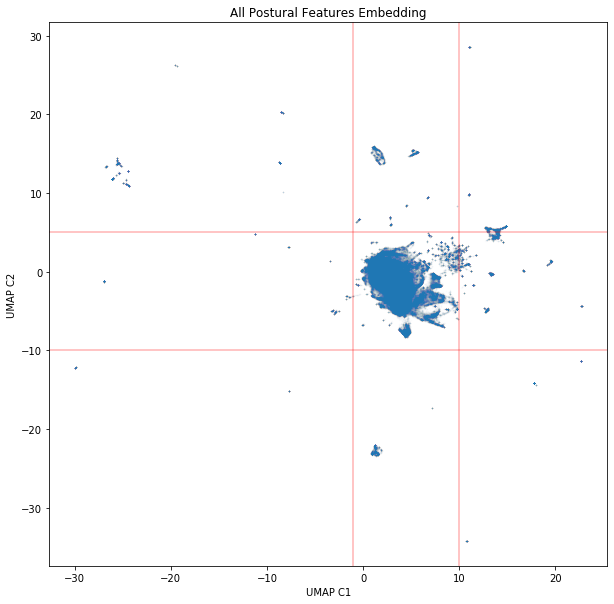

In [89]:
x_lim = (-1,10)
y_lim = (-10,5)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(all_embed[:,0], all_embed[:,1], s=1, alpha=0.01)

for x, y in zip(x_lim, y_lim):
    ax.axvline(x=x, c='r', alpha=0.3)
    ax.axhline(y=y, c='r', alpha=0.3)

ax.set(xlabel='UMAP C1', ylabel='UMAP C2', title="All Postural Features Embedding")
plt.show()

In [90]:
x_cond = (all_embed[:,0]<x_lim[0]) | (all_embed[:,0]>x_lim[1])
y_cond = (all_embed[:,1]<y_lim[0]) | (all_embed[:,1]>y_lim[1])
bad_fr = np.where(x_cond | y_cond)[0]

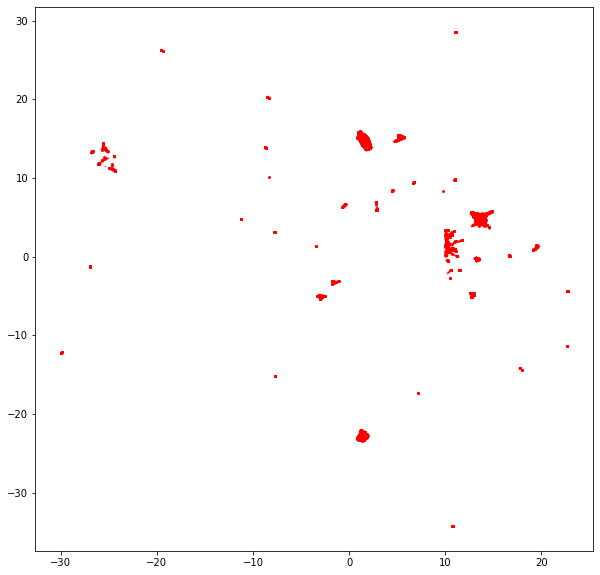

In [92]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(all_embed[bad_fr,0], all_embed[bad_fr,1], s=1, alpha=0.5, c='r')
plt.show()

[10.31447983  1.60800385]


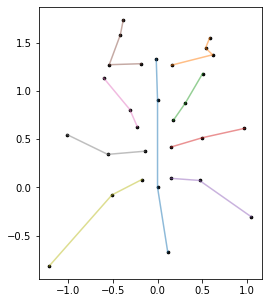

In [139]:
fr = random.choice(bad_fr)
print(all_embed[fr])

fig, ax = plt.subplots(figsize=(4,5))
ax.scatter(bp[fr,:,0], bp[fr,:,1], s=7, c='k')
for skeleton_i, color_i in zip(skeleton, skeleton_color):
    ax.plot(bp[fr,skeleton_i,0], bp[fr,skeleton_i,1], alpha=0.5, c=color_i)
plt.show()

In [129]:
bp[:,:,0:2].shape

(1000781, 30, 2)